In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
gold = pd.read_csv('gold_price_data.csv')
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# for finding any null values
gold.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
# dropning
gold_new=gold.drop(['Date'],axis=1)
gold_new

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1380.949951,87.989998,72.779999,15.834000,1.480210


In [7]:
gold_new.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_new.shape

(2290, 5)

In [9]:
gold_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5)
memory usage: 89.5 KB


In [11]:
#dividing dependent varibles
x = gold_new.drop(['GLD'], axis=1)
y = gold_new['GLD']

In [12]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split


rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
xtrain

,SPX,USO,SLV,EUR/USD
583,1104.180054,32.889999,19.320000,1.269309
2242,2713.830078,12.370000,15.460000,1.223032
1803,1978.349976,9.150000,14.170000,1.088898
1491,1904.010010,31.139999,16.730000,1.279525
1719,2090.350098,14.690000,15.260000,1.103704
723,1314.410034,42.750000,39.570000,1.444210
704,1281.869995,39.389999,33.610001,1.399208
1686,1987.660034,13.950000,13.800000,1.124796
1174,1582.699951,32.389999,22.860001,1.318218
278,852.059998,29.309999,12.550000,1.318044


In [19]:
ytrain

583     121.559998
2242    125.000000
1803    117.769997
1491    119.800003
1719    110.750000
723     141.899994
704     136.270004
1686    107.730003
1174    141.110001
278      87.500000
1770    104.209999
1951    117.099998
185      80.379997
1256    127.790001
1045    170.839996
1755    102.040001
1351    127.580002
1789    113.580002
775     156.570007
19       92.059998
2043    119.040001
1796    117.580002
1958    115.540001
54       89.910004
189      76.180000
505     112.309998
1154    155.360001
64       90.349998
2083    122.449997
1624    113.529999
           ...    
151      84.279999
714     138.210007
544     121.680000
639     135.369995
423     107.339996
659     133.580002
797     171.649994
2272    127.629997
2008    117.699997
99       87.019997
1871    120.110001
2046    119.349998
755     150.559998
976     154.500000
2163    120.669998
1940    120.790001
2120    120.980003
537     121.900002
1701    108.419998
2222    126.800003
2135    126.559998
705     136.

In [20]:
xtest

,SPX,USO,SLV,EUR/USD
1255,1692.770020,36.880001,20.980000,1.351698
2100,2425.530029,9.270000,14.990000,1.147394
711,1309.660034,42.049999,36.119999,1.410596
1328,1838.699951,33.689999,19.510000,1.361804
53,1298.420044,82.290001,18.250999,1.563893
966,1315.989990,35.150002,27.680000,1.281066
2027,2375.310059,11.280000,16.830000,1.062045
501,1210.650024,41.759998,18.070000,1.357405
963,1330.660034,35.279999,26.860001,1.273561
1665,2114.149902,16.340000,14.140000,1.092705


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfr = RandomForestRegressor()

In [23]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
t_pred=rfr.predict(xtest)
t_pred


array([127.365999 , 117.1540001, 140.7209991, 122.4440012,  94.8640008,
       154.9010011, 117.7620003, 113.2460016, 152.9199967, 105.2920007,
       102.8119987, 120.7739992,  92.4389985, 154.773001 , 121.4389985,
       116.8190018,  85.8619975,  92.0519994,  93.1310006, 126.522    ,
        82.7109991, 117.1269978, 125.8899978, 172.8299972, 170.0249954,
       140.091002 , 114.223999 , 159.8130021, 133.0960008, 116.5480005,
       111.3370004, 104.8330025, 128.6049992, 122.1639992,  98.9279991,
       119.6080001,  81.1129996, 115.378    , 127.1539985, 140.8749984,
       107.2990017, 131.0990007, 108.8919974, 133.7239977, 133.1879992,
       148.4409989, 119.6400007, 154.8800002, 158.3430008, 127.6169999,
       124.1649994, 114.202999 , 124.6830015, 118.9590003, 154.2550001,
       121.5110004, 112.3710008,  86.1499981, 156.490001 , 117.7730006,
        88.7479994, 114.3529999,  82.6609994, 145.3940019, 125.3150002,
       127.7729989, 125.2689993, 120.8539987, 165.5540008, 121.8

In [30]:
Y_pred=list(t_pred)

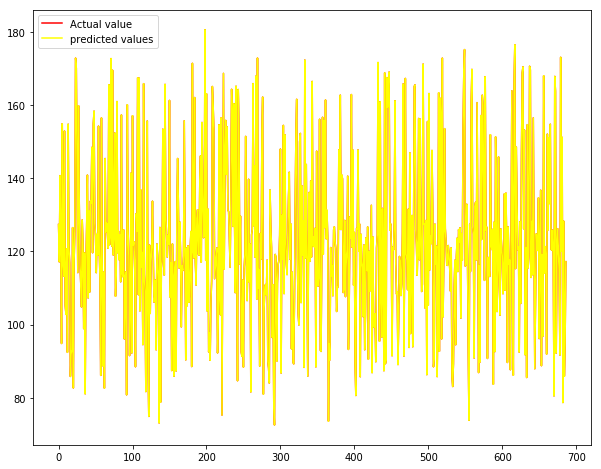

In [29]:
# ploting
plt.figure(figsize=(10,8))
plt.plot(Y_pred,color='red',label='Actual value')
plt.plot(t_pred,color='yellow',label='predicted values')
plt.legend()

In [ ]:
X=gold_data(['Data','GLD'],axis=1)
Y=gold_data['GLD']

In [41]:
print(X)

NameError: name 'X' is not defined

In [39]:
X_train,X_test,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

NameError: name 'X' is not defined

In [40]:
X_train_head()

NameError: name 'X_train_head' is not defined

In [35]:
regressor = RandomForestRegressor(n_estimators=100)


In [37]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)